In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import seaborn
%matplotlib inline

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [5]:
data = pd.read_csv("orange_small_churn_data.train.txt", sep=",")
data["label"] = pd.read_csv("orange_small_churn_labels.train.txt", header=None, names=["label"])

2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
data["label"].value_counts(normalize=True)

-1    0.9256
 1    0.0744
Name: label, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [7]:
numerical_features = data.columns[:-41]
categorical_features = data.columns[-41:-1]

In [8]:
from sklearn.preprocessing import minmax_scale

In [11]:
scaled_numerical_data = pd.DataFrame(minmax_scale(data[numerical_features]), columns=numerical_features)
scaled_numerical_data["label"] = data["label"]

/home/lukashov/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.
/home/lukashov/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:364: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/lukashov/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:365: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [13]:
scaled_numerical_data

Var1  Var2  Var3  Var4  Var5      Var6  Var7  Var8      Var9     Var10  \
0       NaN   NaN   NaN   NaN   NaN  0.023163   NaN   NaN       NaN       NaN   
1       NaN   NaN   NaN   NaN   NaN  0.013760   0.2   NaN       NaN       NaN   
2       NaN   NaN   NaN   NaN   NaN  0.014822   0.2   NaN       NaN       NaN   
3       NaN   NaN   NaN   NaN   NaN  0.011635   0.2   NaN       NaN       NaN   
4       NaN   NaN   NaN   NaN   NaN  0.005206   0.2   NaN       NaN       NaN   
5       0.0   NaN   NaN   NaN   NaN       NaN   NaN   NaN  0.013043       NaN   
6       NaN   NaN   NaN   NaN   NaN  0.006747   0.0   NaN       NaN       NaN   
7       NaN   NaN   NaN   NaN   NaN  0.001222   0.0   NaN       NaN       NaN   
8       NaN   NaN   NaN   NaN   NaN  0.003188   0.0   NaN       NaN       NaN   
9       NaN   NaN   NaN   NaN   NaN  0.008766   0.0   NaN       NaN       NaN   
10      NaN   NaN   NaN   NaN   NaN  0.001116   0.0   NaN       NaN       NaN   
11      NaN   NaN   NaN   NaN   NaN  0.004091   0.0   NaN       NaN       NaN   
12      NaN   NaN   NaN   NaN   NaN  0.003506   0.4   NaN       NaN       NaN   
13      NaN   NaN   NaN   NaN   NaN  0.012803   0.0   NaN       NaN       NaN   
14      NaN   NaN   NaN   NaN   NaN  0.006216   0.2   NaN       NaN       NaN   
15      NaN   NaN   NaN   NaN   NaN  0.004835   0.0   NaN       NaN       NaN   
16      NaN   NaN   NaN   NaN   NaN  0.001753   0.2   NaN       NaN       NaN   
17      NaN   NaN   NaN   0.0   NaN       NaN   NaN   NaN       NaN       NaN   
18      NaN   NaN   NaN   NaN   NaN  0.004356   0.2   NaN       NaN       NaN   
19      NaN   NaN   NaN   NaN   0.0       NaN   NaN   NaN       NaN  0.018031   
20      NaN   NaN   NaN   NaN   NaN  0.000000   0.0   NaN       NaN       NaN   
21      NaN   NaN   NaN   NaN   NaN  0.002284   0.2   NaN       NaN       NaN   
22      NaN   NaN   NaN   NaN   NaN  0.029910   0.2   NaN       NaN       NaN   
23      NaN   NaN   NaN   0.0   NaN       NaN   NaN   NaN       NaN       NaN   
24      NaN   NaN   NaN   NaN   NaN  0.001116   0.0   NaN       NaN       NaN   
25      NaN   NaN   NaN   NaN   NaN  0.024757   0.4   NaN       NaN       NaN   
26      NaN   NaN   NaN   NaN   NaN  0.006056   0.2   NaN       NaN       NaN   
27      NaN   NaN   NaN   NaN   NaN  0.010041   0.2   NaN       NaN       NaN   
28      NaN   NaN   NaN   NaN   NaN  0.007119   0.2   NaN       NaN       NaN   
29      NaN   NaN   NaN   NaN   NaN  0.001913   0.0   NaN       NaN       NaN   
...     ...   ...   ...   ...   ...       ...   ...   ...       ...       ...   
39970   NaN   NaN   NaN   NaN   NaN  0.002444   0.0   NaN       NaN       NaN   
39971   NaN   NaN   NaN   NaN   NaN  0.001753   0.0   NaN       NaN       NaN   
39972   NaN   NaN   NaN   NaN   NaN  0.003878   0.2   NaN       NaN       NaN   
39973   NaN   NaN   NaN   NaN   NaN  0.001222   0.0   NaN       NaN       NaN   
39974   NaN   NaN   NaN   NaN   NaN  0.010360   0.0   NaN       NaN       NaN   
39975   NaN   NaN   NaN   NaN   NaN  0.005047   0.2   NaN       NaN       NaN   
39976   NaN   NaN   NaN   NaN   NaN  0.025448   0.4   NaN       NaN       NaN   
39977   NaN   NaN   NaN   NaN   NaN  0.004091   0.2   NaN       NaN       NaN   
39978   NaN   NaN   NaN   NaN   NaN  0.006216   0.0   NaN       NaN       NaN   
39979   NaN   NaN   NaN   NaN   NaN  0.006694   0.4   NaN       NaN       NaN   
39980   NaN   NaN   NaN   NaN   NaN  0.006003   0.2   NaN       NaN       NaN   
39981   NaN   NaN   NaN   NaN   NaN  0.001063   0.2   NaN       NaN       NaN   
39982   NaN   NaN   NaN   NaN   NaN  0.008925   0.2   NaN       NaN       NaN   
39983   NaN   NaN   NaN   NaN   NaN  0.002391   0.0   NaN       NaN       NaN   
39984   NaN   NaN   NaN   NaN   NaN  0.000000   0.0   NaN       NaN       NaN   
39985   NaN   0.0   0.0   NaN   NaN       NaN   NaN   NaN       NaN       NaN   
39986   NaN   NaN   NaN   NaN   NaN  0.015141   0.2   NaN       NaN       NaN   
39987   NaN   NaN   NaN   NaN   NaN  0

In [18]:
feature_means_by_label = scaled_numerical_data.groupby("label").mean()

In [19]:
scaled_numerical_data.groupby("label").mean()

Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
label                                                                         
-1     0.020338  0.001036  0.003338  0.005464  0.041708  0.010138  0.197824   
 1     0.023454  0.000000  0.002054  0.006061  0.030639  0.008579  0.149071   

       Var8      Var9     Var10  ...    Var181    Var182    Var183    Var184  \
label                            ...                                           
-1      NaN  0.020488  0.030543  ...  0.012429  0.117058  0.026271  0.007308   
 1      NaN  0.023081  0.038798  ...  0.012857  0.111921  0.031042  0.010049   

       Var185    Var186    Var187    Var188    Var189    Var190  
label                                                            
-1        NaN  0.034744  0.017463  0.266603  0.420790  0.099687  
 1        NaN  0.030252  0.020408  0.352573  0.357583  0.077047  

[2 rows x 190 columns]

In [20]:
feature_means_by_label.diff(axis=0)

Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
label                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.003117 -0.001036 -0.001284  0.000596 -0.011069 -0.001559 -0.048753   

       Var8      Var9     Var10  ...    Var181    Var182    Var183    Var184  \
label                            ...                                           
-1      NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
 1      NaN  0.002593  0.008256  ...  0.000428 -0.005137  0.004771  0.002741   

       Var185    Var186    Var187    Var188    Var189   Var190  
label                                                           
-1        NaN       NaN       NaN       NaN       NaN      NaN  
 1        NaN -0.004492  0.002945  0.085971 -0.063207 -0.02264  

[2 rows x 190 columns]

In [44]:
numerical_corr = feature_means_by_label.diff(axis=0).iloc[1]

In [59]:
numerical_corr.apply(abs).sort_values(ascending=False)[:5]

Var188    0.085971
Var130    0.082077
Var189    0.063207
Var114    0.056624
Var73     0.053928
Name: 1, dtype: float64

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [45]:
top20_numerical_features = numerical_corr.apply(abs).sort_values(ascending=False)[:20].index.values

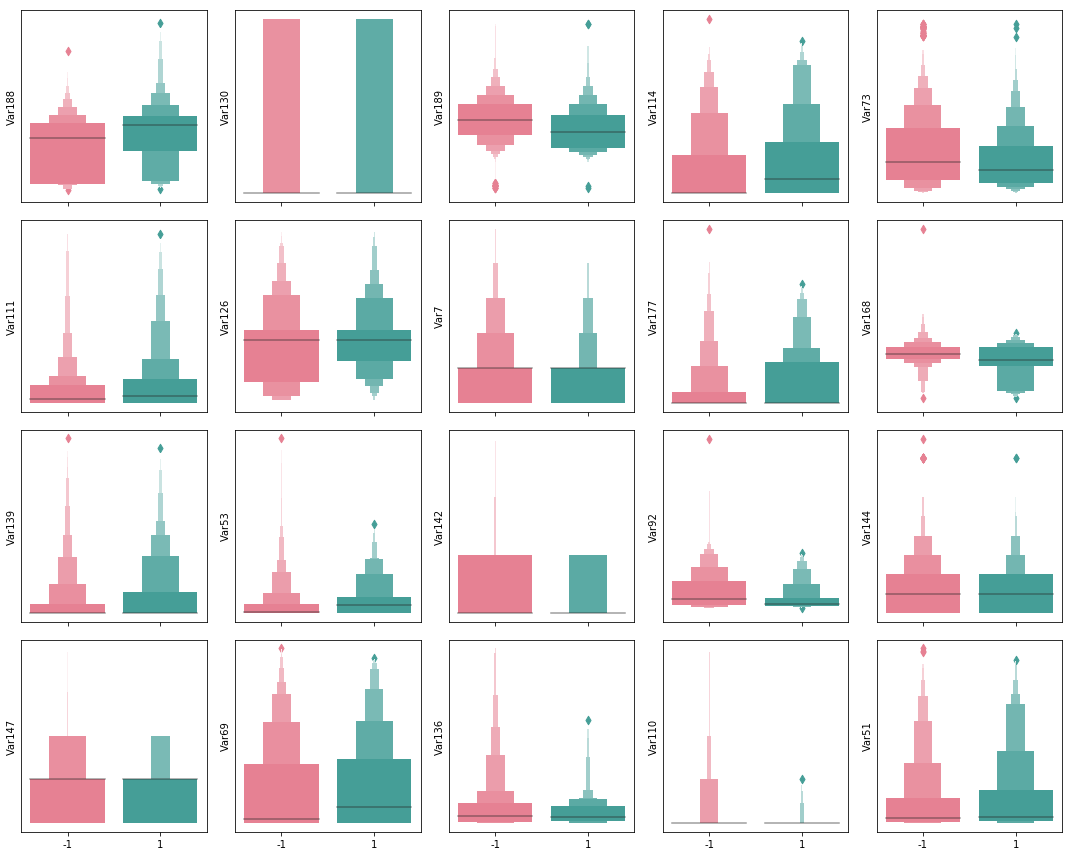

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12), sharex=True)

for axis_index, axis in enumerate(axes.flatten()):
    seaborn.boxenplot(
        data=data[np.append(top20_numerical_features[axis_index], "label")],
        x="label",
        y=top20_numerical_features[axis_index],
        palette="husl",
        ax=axis
    )
    axis.set_xlabel("")
    axis.set_yticks([])
figure.tight_layout()

/Users/hybris/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/hybris/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


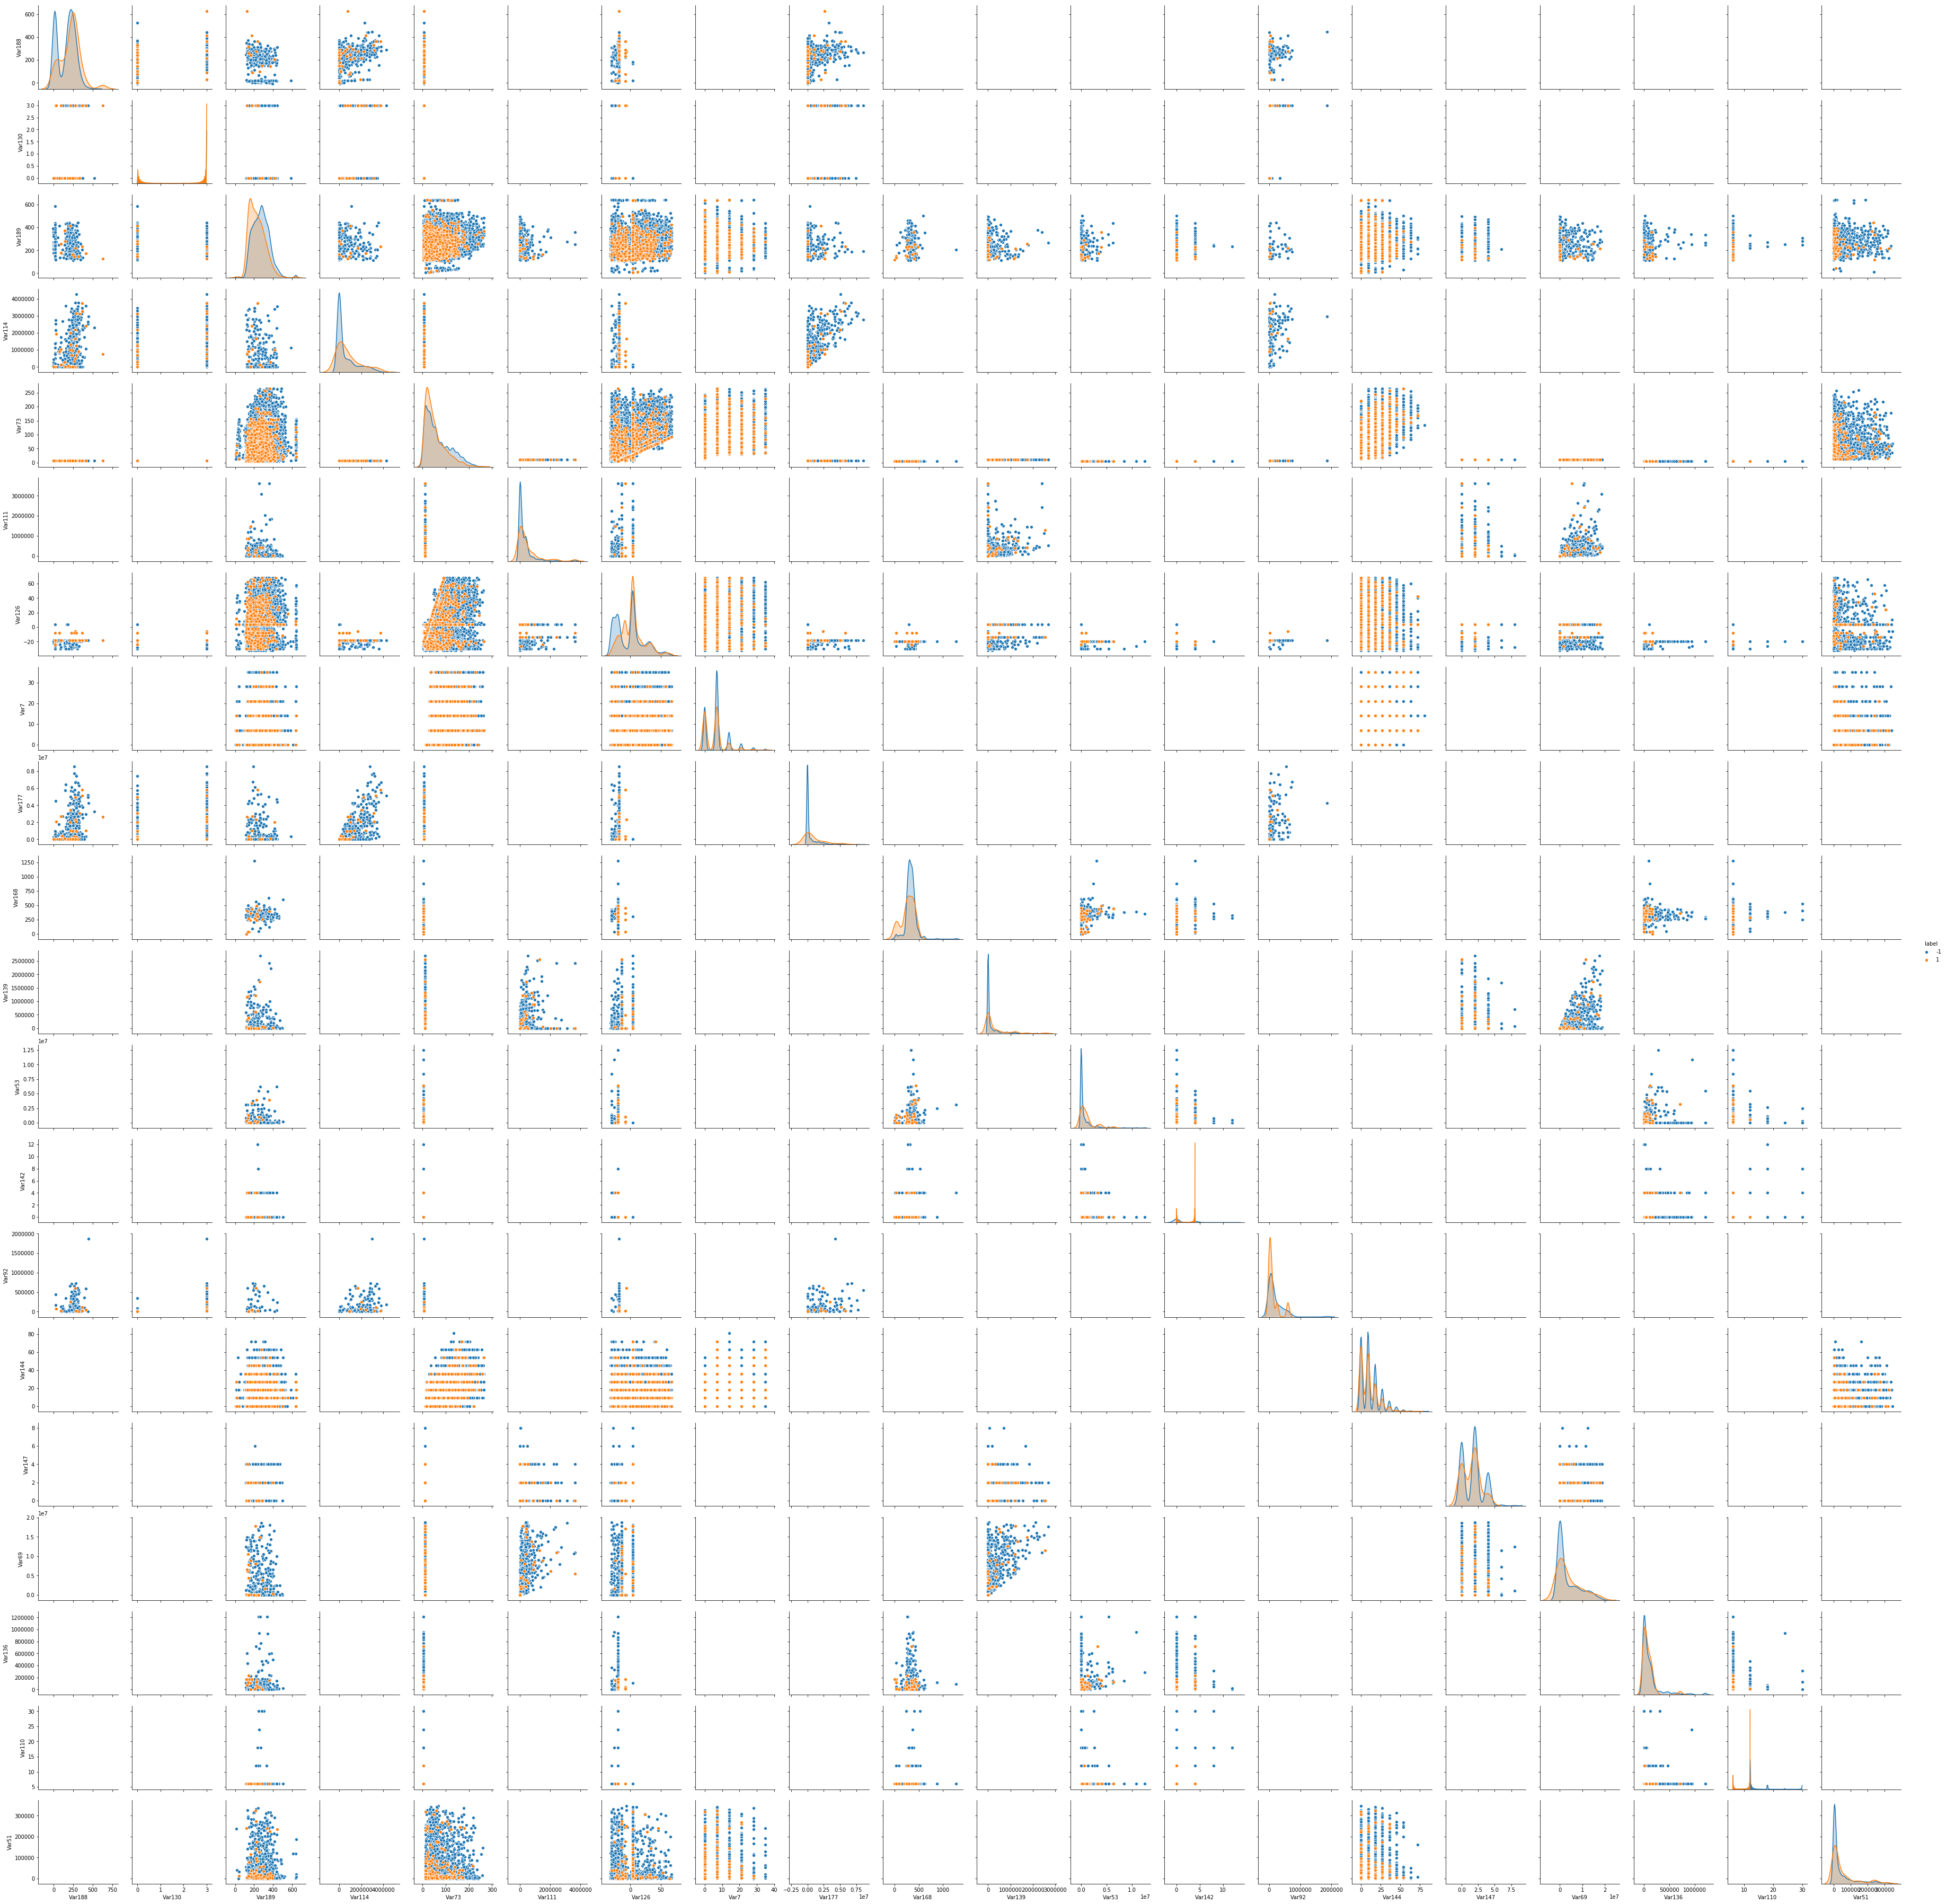

In [47]:
seaborn.pairplot(
    data=data[np.append(top20_numerical_features, "label")],
    hue="label",
    vars=top20_numerical_features
)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [44]:
random_numerical_features = numerical_features[np.random.randint(
    low=0,
    high=numerical_features.shape[0]-1,
    size=10
)].values

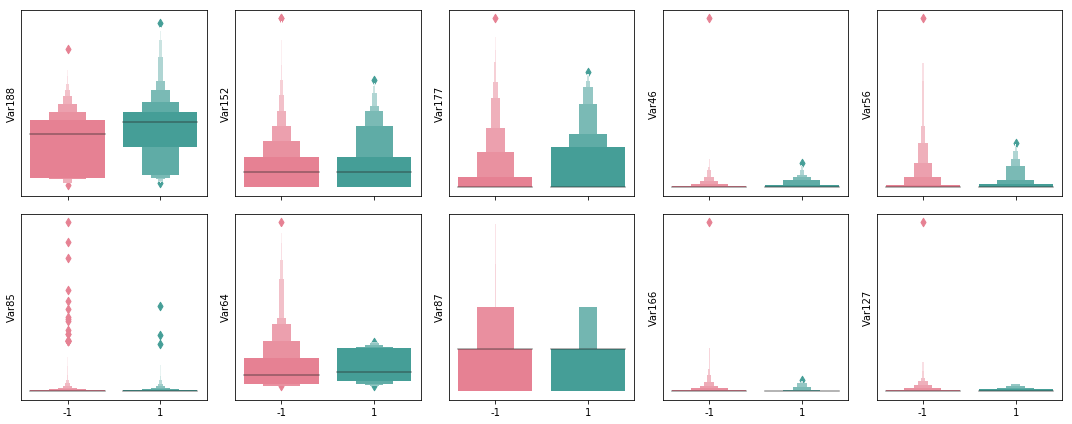

In [45]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), sharex=True)

for axis_index, axis in enumerate(axes.flatten()):
    seaborn.boxenplot(
        data=data[np.append(random_numerical_features[axis_index], "label")],
        x="label",
        y=random_numerical_features[axis_index],
        palette="husl",
        ax=axis
    )
    axis.set_xlabel("")
    axis.set_yticks([])
figure.tight_layout()

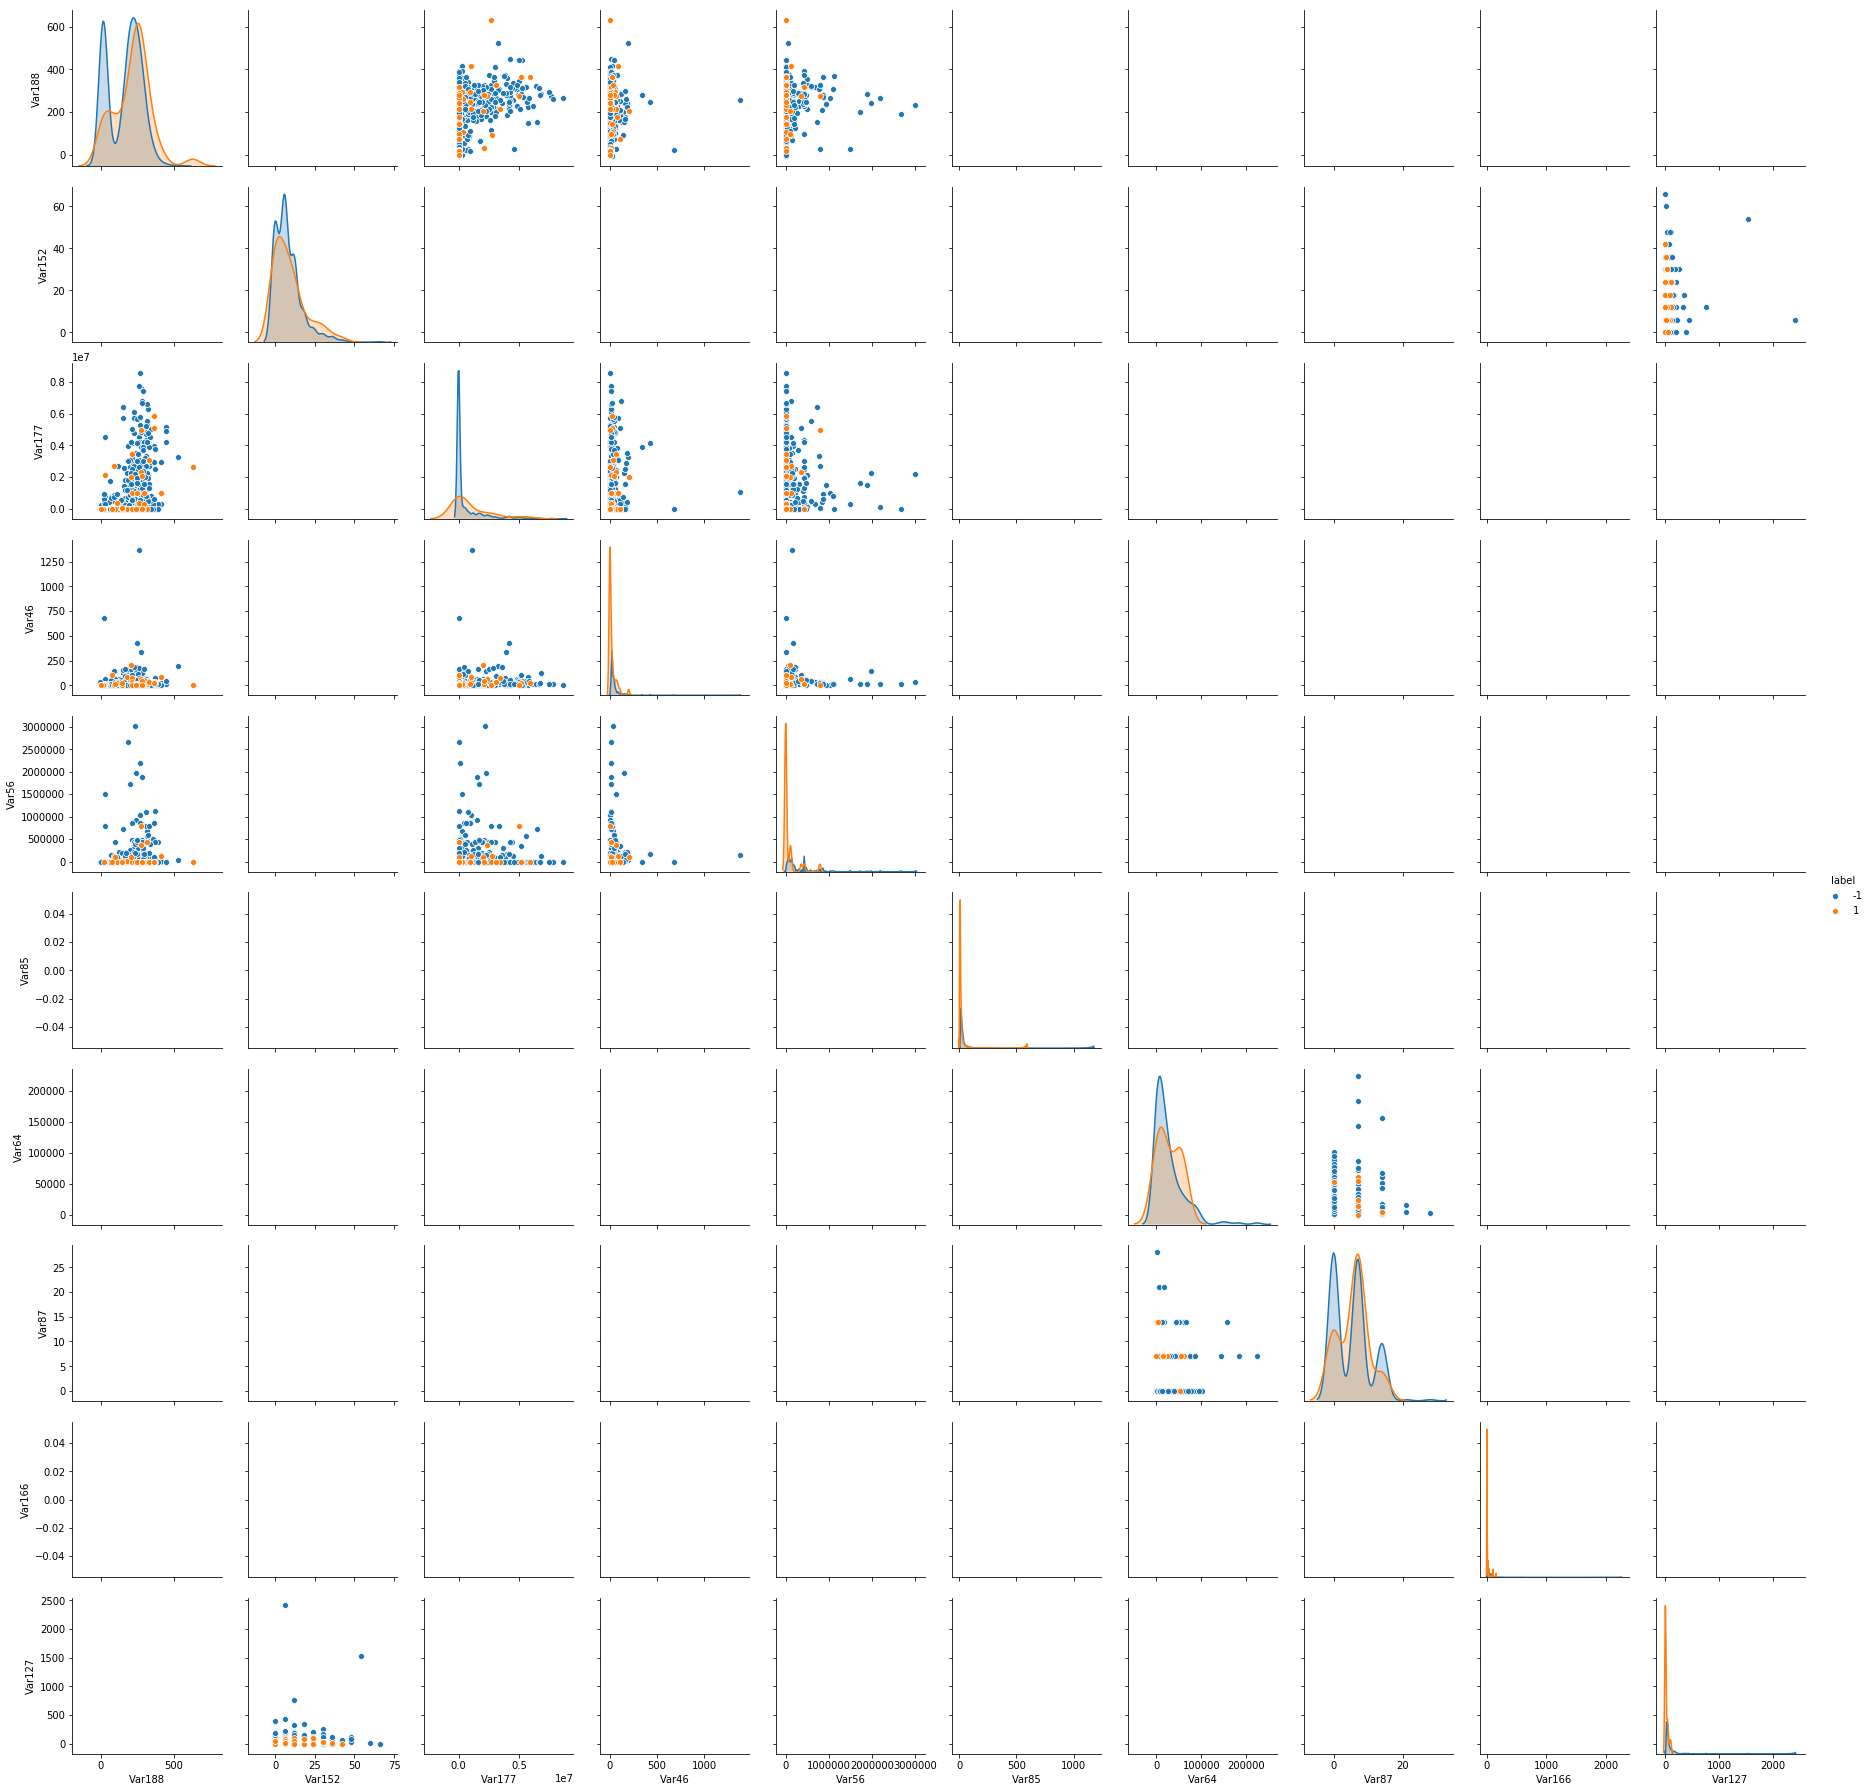

In [46]:
seaborn.pairplot(
    data=data[np.append(random_numerical_features, "label")],
    hue="label",
    vars=random_numerical_features
)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [50]:
bottom10_numerical_features = numerical_corr.apply(abs).sort_values(ascending=True)[:10].index.values

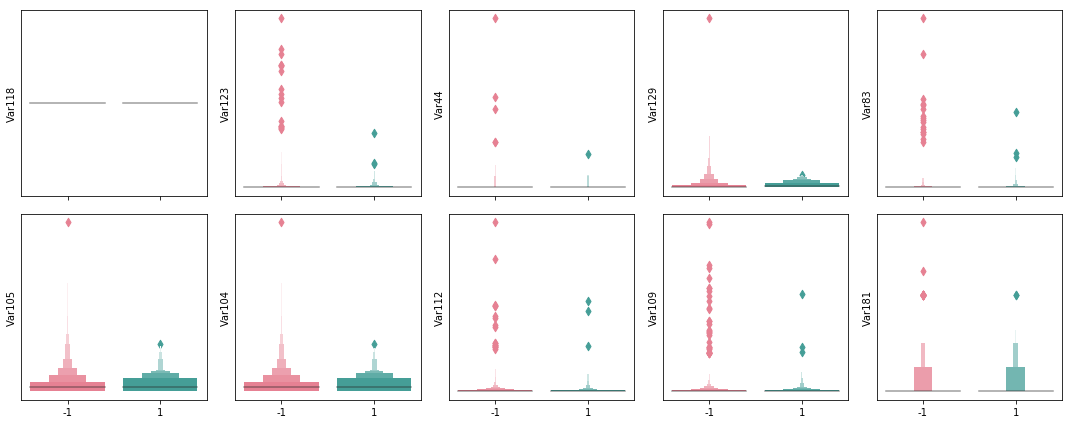

In [51]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6), sharex=True)

for axis_index, axis in enumerate(axes.flatten()):
    seaborn.boxenplot(
        data=data[np.append(bottom10_numerical_features[axis_index], "label")],
        x="label",
        y=bottom10_numerical_features[axis_index],
        palette="husl",
        ax=axis
    )
    axis.set_xlabel("")
    axis.set_yticks([])
figure.tight_layout()

/Users/hybris/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/hybris/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/hybris/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


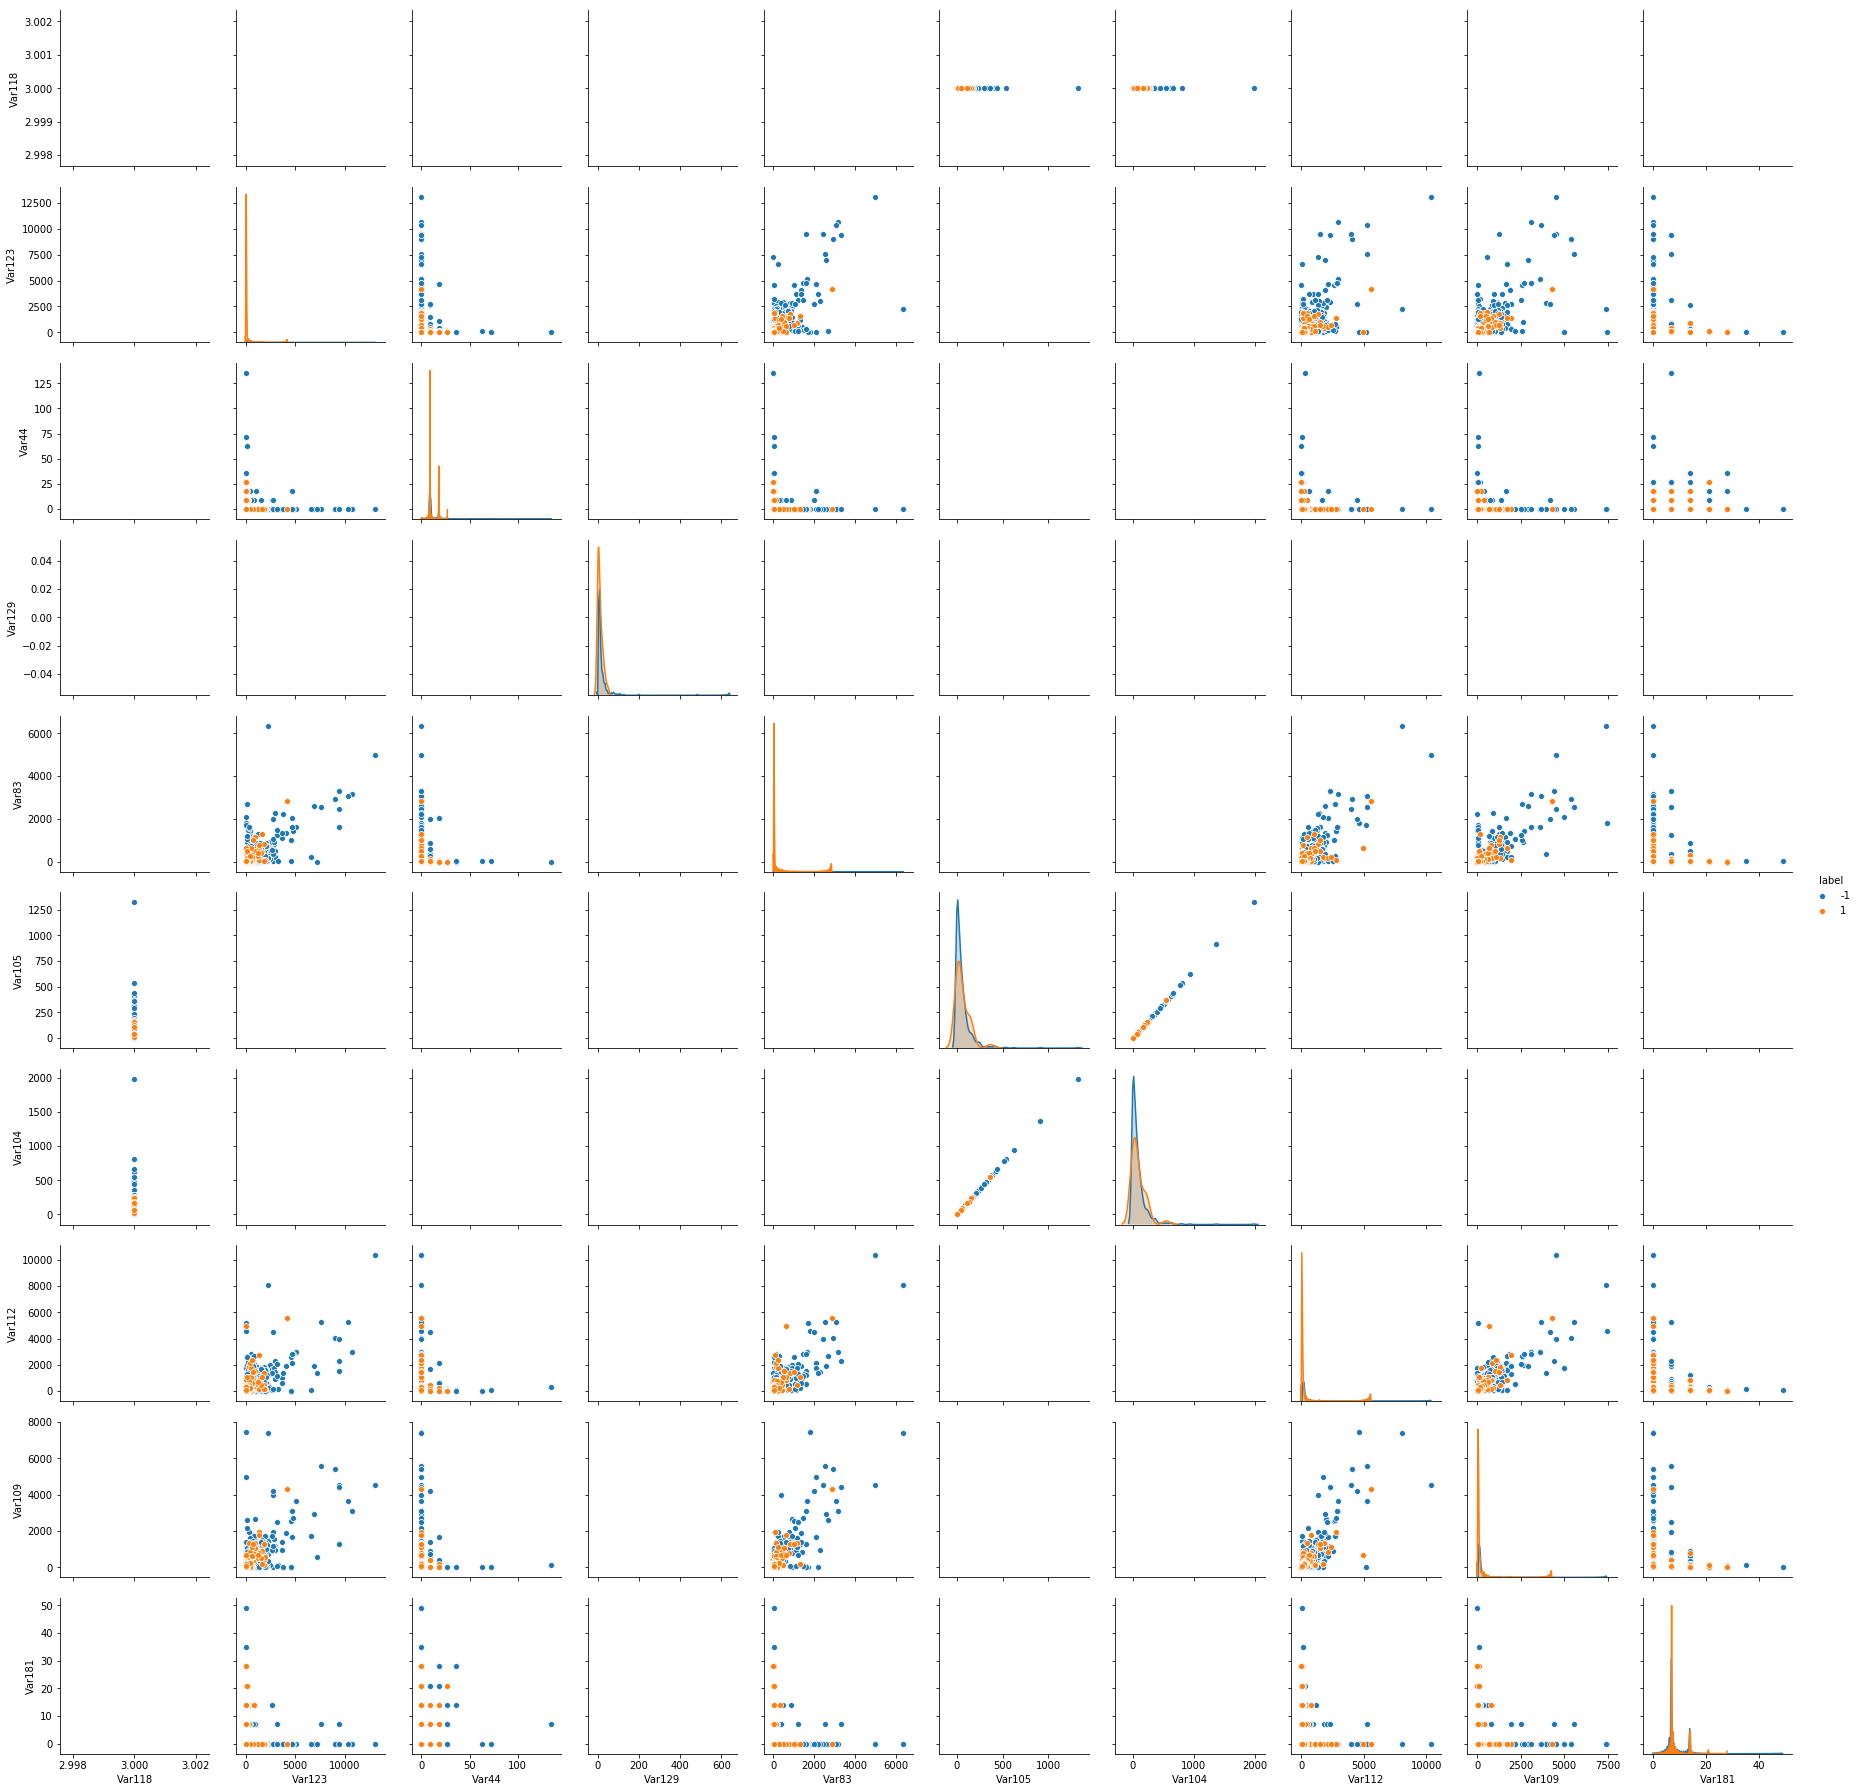

In [52]:
seaborn.pairplot(
    data=data[np.append(bottom10_numerical_features, "label")],
    hue="label",
    vars=bottom10_numerical_features
)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [51]:
nonnull_categorical_features = categorical_corr.sort_values(ascending=False).dropna().index.values

In [52]:
feasible_categorical_features = nonnull_categorical_features[data[nonnull_categorical_features].nunique() < 30]

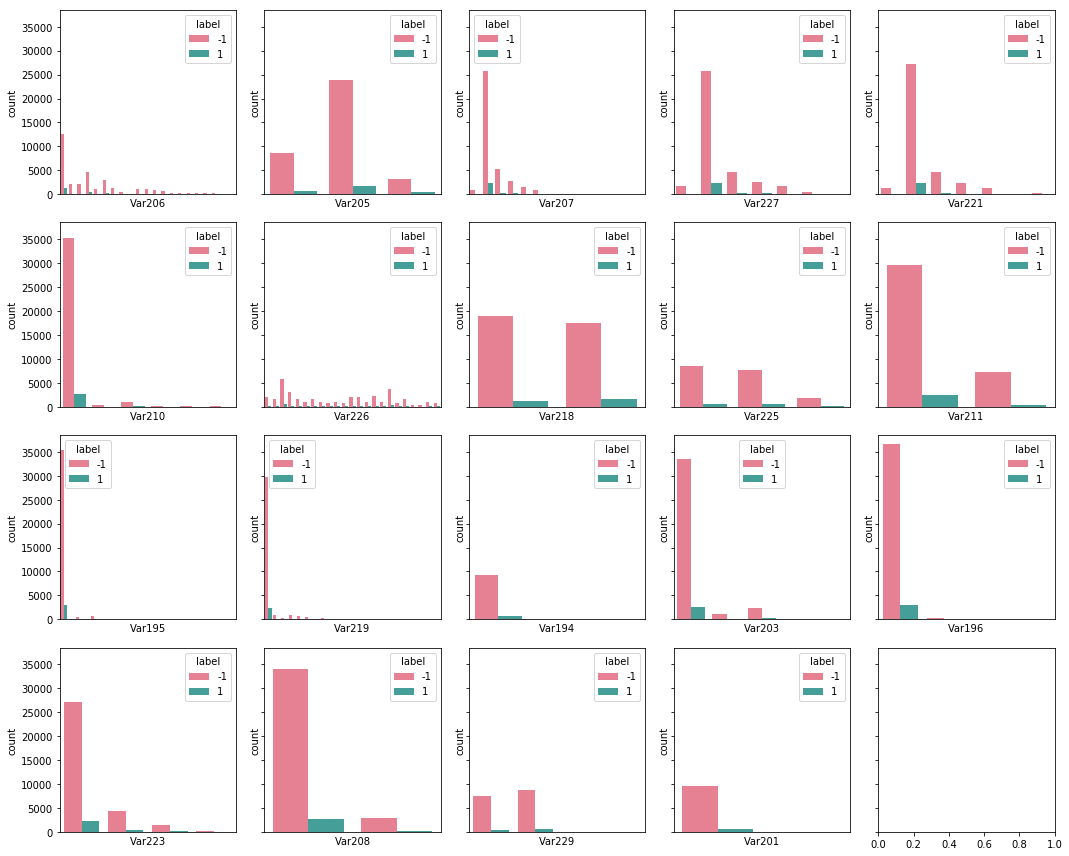

In [53]:
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12), sharey=True)

for axis_index, axis in enumerate(axes.flatten()):
    if axis_index <= feasible_categorical_features.shape[0]-1:
        seaborn.countplot(
            data=data[np.append(feasible_categorical_features[axis_index], "label")],
            x=feasible_categorical_features[axis_index],
            hue="label",
            palette="husl",
            ax=axis
        )
        axis.set_xticks([])

figure.tight_layout()

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. В данных много признаков, которые не заполнены совсем, либо категориальных признаков с очень небольшим числом записей.
2. Среди числовых признаков мало существенно отличающихся по мат. ожиданию для того или иного класса.
3. Среди топ-20 числовых признаков по корреляции нет таких пар, по которым можно было бы однозначно разделить классы. Тем не менее, на диаграммах распределения попарных сочетаний признаков иногда можно выделить "сгустки" областей того или иного класса - при построении модели можно будет попробовать методы, дающие нелинейные разделяющие поверхности, а также поэкспериментировать с сочетаниями признаков больше, чем по 2. Возможно, решающие деревья будут хорошо работать.
4. Среди числовых признаков не везде получится опираться на сочетания признаков - за счёт небольшого числа значений количество получающихся пар недостаточно.
5. Среди категориальных есть много признаков с большим числом возможных значений - визуализировать их затруднительно.
6. Среди прочих категориальных признаков нет ни одного, для которого класс можно было бы опознать по тому или иному значению. Возможно, стоит поэкспериментировать с сочетаниями категориальных и числовых признаков.
7. Похоже, что наибольший вклад в полезность модели внесут как можно более заполненные признаки, в сочетании друг с другом. К сожалению, часть признаков придётся выбросить из модели сразу - по ним отсутствуют значения.
8. Отбор признаков будет однозначно полезен для качества модели - признаков много и их корреляция с классом неочевидна. Думаю, что большой прирост качества даст использование сочетаний признаков.